In [24]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy import stats
from pprint import pprint
from config import openWeatherKey

In [4]:
weatherDisasterCSV = "Resources/disaster_data.csv"
coordCSV = "output_data/NEW_coordinates.csv"
wDisaster_df = pd.read_csv(weatherDisasterCSV)
desiredColumns = ["Dis No", "Year", "Seq", "Disaster Subgroup", "Disaster Type", "Disaster Subtype", "Disaster Subsubtype", "Entry Criteria", "ISO", "Location", "Start Month", "End Month", "Total Deaths", "No Injured", "No Affected", "No Homeless", "Total Affected", "Insured Damages ('000 US$)", "Total Damages ('000 US$)", "CPI"]
wDisaster_df = wDisaster_df.loc[wDisaster_df["ISO"] == "USA", desiredColumns]
wDisaster_df
pd.options.display.max_rows = 999

In [5]:
wDisaster_df

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Entry Criteria,ISO,Location,Start Month,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI
2,2000-0080-USA,2000,80,Hydrological,Flood,Riverine flood,NaN,Affect,USA,"Kentucky, Ohio provinces",2,2.0,3.0,NaN,231.0,NaN,231.0,NaN,NaN,67.355759
3,2000-0500-USA,2000,500,Hydrological,Flood,Riverine flood,NaN,Affect,USA,"Morris, Sussex districts (New Jersey province)",8,8.0,NaN,NaN,175.0,NaN,175.0,NaN,166000.0,67.355759
4,2000-0919-USA,2000,919,Meteorological,Storm,NaN,NaN,SigDam,USA,"Alabama, Georgia, Louisiana, North Carolina, S...",1,1.0,4.0,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
5,2000-9712-USA,2000,9712,Climatological,Drought,Drought,NaN,Affected,USA,Wyoming province,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.355759
6,2000-0838-USA,2000,838,Meteorological,Storm,Convective storm,Winter storm/Blizzard,Kill,USA,"Texas, Oklahoma, New Mexico, Arkansas, Missour...",12,12.0,57.0,34.0,NaN,NaN,34.0,200500.0,10000.0,67.355759
7,2000-0021-USA,2000,21,Meteorological,Storm,Convective storm,Tornado,Affect,USA,"Crittenden, Daviess, Webster districts (Kentuc...",1,1.0,1.0,12.0,NaN,150.0,162.0,200500.0,210000.0,67.355759
8,2000-0067-USA,2000,67,Meteorological,Storm,Convective storm,Tornado,Kill,USA,"Bullock, Montgomery districts (Alabama provinc...",2,2.0,22.0,100.0,900.0,NaN,1000.0,NaN,NaN,67.355759
9,2000-0175-USA,2000,175,Meteorological,Storm,Convective storm,Tornado,Affect,USA,"Fort Worth Texas city (Tarrant district, Texas...",3,3.0,5.0,NaN,3000.0,300.0,3300.0,NaN,450000.0,67.355759
10,2000-0338-USA,2000,338,Meteorological,Storm,Convective storm,Tornado,Declar/Int,USA,"Adams, Columbia, Crawford, Dane, Dodge, Grant,...",5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,28500.0,67.355759
11,2000-0463-USA,2000,463,Meteorological,Storm,Convective storm,Tornado,Affect,USA,"Granite Falls city (Yellow Medicine, Minnesota...",7,7.0,1.0,15.0,900.0,120.0,1035.0,NaN,8100.0,67.355759


In [6]:
newData = {
    "Location": [],
    "Dis No": []
}

for index, row in wDisaster_df.iterrows():
    #print(type(newData["Location"]))
    if type(row["Location"]) is str:
        for location in row["Location"].split(","):
            newData["Location"].append(location)
            newData["Dis No"].append(row["Dis No"])
splitLocations_df = pd.DataFrame(newData)
splitLocations_df["Location"].value_counts()

 Missouri                              80
 Kansas                                77
 Oklahoma                              60
 Indiana                               59
 Mississippi                           58
                                       ..
 Helotes                                1
 Sumner                                 1
 Tuolumne                               1
 Slidell area (St. Tammany district     1
 Alexander                              1
Name: Location, Length: 1415, dtype: int64

In [7]:
print(wDisaster_df.columns)
wDisaster_df.groupby("Disaster Type").count()

Index(['Dis No', 'Year', 'Seq', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Disaster Subsubtype', 'Entry Criteria', 'ISO',
       'Location', 'Start Month', 'End Month', 'Total Deaths', 'No Injured',
       'No Affected', 'No Homeless', 'Total Affected',
       'Insured Damages ('000 US$)', 'Total Damages ('000 US$)', 'CPI'],
      dtype='object')


,Dis No,Year,Seq,Disaster Subgroup,Disaster Subtype,Disaster Subsubtype,Entry Criteria,ISO,Location,Start Month,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI
Disaster Type,,,,,,,,,,,,,,,,,,,
Drought,11,11,11,11,11,0,11,11,11,11,8,0,0,0,0,0,3,9,11
Earthquake,9,9,9,9,9,0,9,9,9,9,9,3,7,7,2,9,4,8,9
Epidemic,3,3,3,3,2,0,3,3,2,3,3,1,0,3,0,3,0,0,3
Extreme temperature,13,13,13,13,13,2,13,13,13,13,13,12,1,0,0,1,3,3,13
Flood,94,94,94,94,79,0,93,94,94,94,94,70,7,69,5,73,22,54,94
Landslide,3,3,3,3,3,0,3,3,3,3,3,3,2,1,1,3,0,2,3
Storm,278,278,278,278,258,203,278,278,278,278,278,238,102,86,29,155,175,224,274
Volcanic activity,1,1,1,1,1,0,1,1,1,1,1,0,0,1,0,1,0,1,1
Wildfire,62,62,62,62,52,0,62,62,62,62,62,32,22,26,40,54,17,42,62


In [8]:
splitLocations_df["Lat"] = ""
splitLocations_df["Long"] = ""
locations = splitLocations_df["Location"]
splitLocations_df

,Location,Dis No,Lat,Long
0,Kentucky,2000-0080-USA,,
1,Ohio provinces,2000-0080-USA,,
2,Morris,2000-0500-USA,,
3,Sussex districts (New Jersey province),2000-0500-USA,,
4,Alabama,2000-0919-USA,,
...,...,...,...,...
4019,Georgia,2020-0082-USA,,
4020,Texas,2020-0082-USA,,
4021,errebonne,2020-0219-USA,,
4022,Plaquemines,2020-0219-USA,,


In [9]:
coordLocations_df = pd.read_csv(coordCSV)
coordLocations_df = coordLocations_df.loc[:, ["Location", "Dis No", "Lat", "Long"]]
coordLocations_df

,Location,Dis No,Lat,Long
0,Kentucky,2000-0080-USA,34.61,-92.66
1,Morris,2000-0500-USA,40.83,-74.53
2,Alabama,2000-0919-USA,32.75,-86.75
3,Georgia,2000-0919-USA,32.75,-83.50
4,Louisiana,2000-0919-USA,31.00,-92.00
...,...,...,...,...
2856,Kentucky,2020-0082-USA,34.61,-92.66
2857,Missouri,2020-0082-USA,38.25,-92.50
2858,Mississippi,2020-0082-USA,32.75,-89.75
2859,Georgia,2020-0082-USA,32.75,-83.50


In [10]:
combinedData = pd.merge(coordLocations_df, wDisaster_df, on="Dis No", how="outer")
combinedData = combinedData.iloc[range(0,2861), :].rename(columns={"Location_x": "Location"})
combinedData

,Location,Dis No,Lat,Long,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,...,Start Month,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,Kentucky,2000-0080-USA,34.61,-92.66,2000,80,Hydrological,Flood,Riverine flood,NaN,...,2,2.0,3.0,NaN,231.0,NaN,231.0,NaN,NaN,67.355759
1,Morris,2000-0500-USA,40.83,-74.53,2000,500,Hydrological,Flood,Riverine flood,NaN,...,8,8.0,NaN,NaN,175.0,NaN,175.0,NaN,166000.0,67.355759
2,Alabama,2000-0919-USA,32.75,-86.75,2000,919,Meteorological,Storm,NaN,NaN,...,1,1.0,4.0,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
3,Georgia,2000-0919-USA,32.75,-83.50,2000,919,Meteorological,Storm,NaN,NaN,...,1,1.0,4.0,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
4,Louisiana,2000-0919-USA,31.00,-92.00,2000,919,Meteorological,Storm,NaN,NaN,...,1,1.0,4.0,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856,Kentucky,2020-0082-USA,34.61,-92.66,2020,82,Meteorological,Storm,Convective storm,Tornado,...,3,3.0,25.0,300.0,12000.0,NaN,12300.0,NaN,1100000.0,NaN
2857,Missouri,2020-0082-USA,38.25,-92.50,2020,82,Meteorological,Storm,Convective storm,Tornado,...,3,3.0,25.0,300.0,12000.0,NaN,12300.0,NaN,1100000.0,NaN
2858,Mississippi,2020-0082-USA,32.75,-89.75,2020,82,Meteorological,Storm,Convective storm,Tornado,...,3,3.0,25.0,300.0,12000.0,NaN,12300.0,NaN,1100000.0,NaN
2859,Georgia,2020-0082-USA,32.75,-83.50,2020,82,Meteorological,Storm,Convective storm,Tornado,...,3,3.0,25.0,300.0,12000.0,NaN,12300.0,NaN,1100000.0,NaN


In [60]:
thirdQuintant = combinedData.loc[(combinedData["Long"] < -90) & (combinedData["Long"] > -105), :]
areasAffected = len(thirdQuintant["Location"].unique())

# # Ignore this code
# thirdQuintantNorth = thirdQuintant.loc[thirdQuintant["Lat"] > 40, :].reset_index(drop=True)
# thirdQuintantSouth = thirdQuintant.loc[thirdQuintant["Lat"] < 40, :].reset_index(drop=True)
# northAreasAffected = len(thirdQuintantNorth["Location"].unique())
# southAreasAffected = len(thirdQuintantSouth["Location"].unique())

162

In [12]:
#Creating a trimmed DF of dropped duplicates for more accurate calculations
uniqueDisNo_df = thirdQuintant.drop_duplicates(subset="Dis No", keep="first")
#My regions unique DF for plotting
uniqueThirdQuintant = uniqueDisNo_df.loc[(uniqueDisNo_df["Long"] < -90) & (uniqueDisNo_df["Long"] > -105), :]

# #Ignore this code
# uniqueThirdQuintantNorth = uniqueDisNo_df.loc[uniqueDisNo_df["Lat"] > 40, :].reset_index(drop=True)
# uniqueThirdQuintantSouth = uniqueDisNo_df.loc[uniqueDisNo_df["Lat"] < 40, :].reset_index(drop=True)


# uniqueNorthAreasAffected = len(uniqueThirdQuintantNorth["Location"].unique())
# uniqueSouthAreasAffected = len(uniqueThirdQuintantNorth["Location"].unique())
uniqueThirdQuintant

,Location,Dis No,Lat,Long,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,...,Start Month,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,Kentucky,2000-0080-USA,34.61,-92.66,2000,80,Hydrological,Flood,Riverine flood,NaN,...,2,2.0,3.0,NaN,231.0,NaN,231.0,NaN,NaN,67.355759
4,Louisiana,2000-0919-USA,31.00,-92.00,2000,919,Meteorological,Storm,NaN,NaN,...,1,1.0,4.0,NaN,NaN,NaN,NaN,280000.0,350000.0,67.355759
11,Texas,2000-0838-USA,31.25,-99.25,2000,838,Meteorological,Storm,Convective storm,Winter storm/Blizzard,...,12,12.0,57.0,34.0,NaN,NaN,34.0,200500.0,10000.0,67.355759
16,Crittenden,2000-0021-USA,35.23,-90.28,2000,21,Meteorological,Storm,Convective storm,Tornado,...,1,1.0,1.0,12.0,NaN,150.0,162.0,200500.0,210000.0,67.355759
19,Mitchell,2000-0067-USA,43.71,-98.03,2000,67,Meteorological,Storm,Convective storm,Tornado,...,2,2.0,22.0,100.0,900.0,NaN,1000.0,NaN,NaN,67.355759
22,Adams,2000-0338-USA,39.87,-104.38,2000,338,Meteorological,Storm,Convective storm,Tornado,...,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,28500.0,67.355759
35,Benton,2000-0360-USA,34.56,-92.59,2000,360,Meteorological,Storm,Convective storm,Severe storm,...,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.355759
54,Monroe,2000-0652-USA,32.51,-92.12,2000,652,Meteorological,Storm,Tropical cyclone,NaN,...,10,10.0,2.0,NaN,14418.0,3015.0,17433.0,NaN,219000.0,67.355759
55,Texas,2000-0433-USA,31.25,-99.25,2000,433,Meteorological,Extreme temperature,Heat wave,NaN,...,7,7.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,67.355759
58,Lafayette,2000-0128-USA,30.22,-92.02,2000,128,Climatological,Wildfire,Forest fire,NaN,...,2,2.0,NaN,NaN,600.0,NaN,600.0,NaN,NaN,67.355759


In [14]:
#Distaster subtypes value counts into variables to use in the future 
regionDisTypesCount = uniqueThirdQuintant["Disaster Type"].value_counts()
regionDisSubTypeCount = uniqueThirdQuintant["Disaster Subtype"].value_counts()

# #My region split into two. Ignore this code.
# northDisTypesCount = thirdQuintantNorth["Disaster Type"].value_counts()
# southhDisTypesCount = thirdQuintantSouth["Disaster Type"].value_counts()
# northDisTypesCount

Storm                  235
Flood                   35
Drought                 15
Extreme temperature     12
Epidemic                 2
Wildfire                 2
Name: Disaster Type, dtype: int64

In [61]:
#Print summary of total disaster count and areas affected
totalDisasterCount = len(uniqueThirdQuintant['Disaster Subtype'])
print(f"There were {totalDisasterCount} total distaters in the Midwest Region\nThere {areasAffected} total areas affected")

There were 232 total distaters in the Midwest Region
There 162 total areas affected


In [17]:
#DF for Occurances of Disaster SubTypes plot
regionalDisGroupby = uniqueThirdQuintant.groupby(["Disaster Type", "Disaster Subtype"]).agg({"Location": "count", "Total Damages ('000 US$)" : "sum"})

# #Ignore these two variables
# northDisGroupby = uniqueThirdQuintantNorth.groupby(["Disaster Type", "Disaster Subtype"]).agg({"Location": "count", "Total Damages ('000 US$)" : "sum"})
# southDisGroupby = uniqueThirdQuintantSouth.groupby(["Disaster Type", "Disaster Subtype"]).agg({"Location": "count", "Total Damages ('000 US$)" : "sum"})


array(['Cold wave', 'Convective storm', 'Drought', 'Extra-tropical storm',
       'Flash flood', 'Forest fire', 'Heat wave', 'Riverine flood',
       'Severe winter conditions', 'Tropical cyclone', 'Viral disease'],
      dtype=object)

In [18]:
regionalDisGroupby

Location  \
Disaster Type       Disaster Subtype                     
Drought             Drought                          5   
Epidemic            Viral disease                    2   
Extreme temperature Cold wave                        2   
                    Heat wave                        5   
                    Severe winter conditions         1   
Flood               Flash flood                      3   
                    Riverine flood                  28   
Storm               Convective storm               140   
                    Extra-tropical storm             1   
                    Tropical cyclone                19   
Wildfire            Forest fire                      7   

                                              Total Damages ('000 US$)  
Disaster Type       Disaster Subtype                                    
Drought             Drought                                 32400000.0  
Epidemic            Viral disease                                  0.0  
Extreme temperature Cold wave                                3600000.0  
                    Heat wave                                      0.0  
                    Severe winter conditions                  200000.0  
Flood               Flash flood                              4950000.0  
                    Riverine flood                          29493000.0  
Storm               Convective storm                       165146570.0  
                    Extra-tropical storm                     1000000.0  
                    Tropical cyclone                       254429000.0  
Wildfire            Forest fire                              1300000.0

Text(0, 0.5, 'Occurance Count')

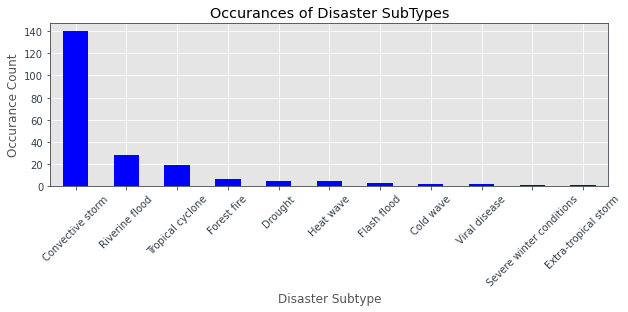

In [30]:
plt.figure(figsize=(10,3))

regionDisSubTypeCount.plot(kind="bar", facecolor="blue", rot=45)
plt.style.use('ggplot')
plt.title("Occurances of Disaster SubTypes")
plt.xlabel("Disaster Subtype")
plt.ylabel("Occurance Count")

Text(0, 0.5, 'Cost in US Dollars')

<Figure size 720x720 with 0 Axes>

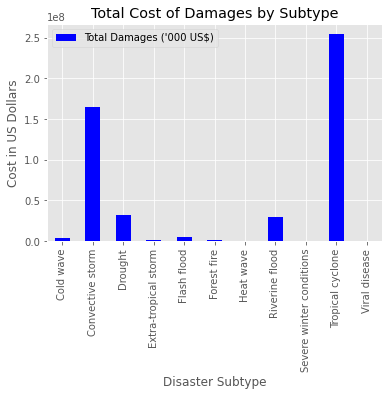

In [54]:
#Total damages by subtype
regionalDisGroupby1 = uniqueThirdQuintant.groupby("Disaster Subtype").agg({"Location": "count", "Total Damages ('000 US$)" : "sum"})

plt.figure(figsize=(10,10))

regionalDisGroupby1.plot(kind="bar", facecolor="blue", y="Total Damages ('000 US$)", rot=90)
plt.title("Total Cost of Damages by Subtype")
plt.xlabel("Disaster Subtype")
plt.ylabel("Cost in US Dollars")

In [33]:
regionalDisGroupbyNoAff = uniqueThirdQuintant.groupby(["Disaster Subtype"]).agg({"No Homeless": "sum", "Total Deaths": "sum", "No Affected": "sum","Total Affected": "sum"})
regionalDisGroupbyNoAff = regionalDisGroupbyNoAff.drop(index="Drought")

,No Homeless,Total Deaths,No Affected,Total Affected
Disaster Subtype,,,,
Cold wave,0.0,79.0,0.0,0.0
Convective storm,32520.0,2238.0,85239475.0,85280018.0
Extra-tropical storm,0.0,12.0,0.0,0.0
Flash flood,0.0,43.0,33000.0,33000.0
Forest fire,2178.0,22.0,1600.0,3778.0
Heat wave,0.0,269.0,0.0,31.0
Riverine flood,16400.0,219.0,11328785.0,11345443.0
Severe winter conditions,0.0,19.0,0.0,0.0
Tropical cyclone,170015.0,434.0,3333218.0,3503262.0


Text(0, 0.5, 'Total')

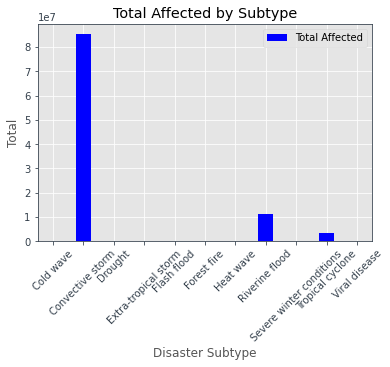

In [51]:
regionalDisGroupbyNoAff.plot.bar(use_index=True, y=["Total Affected"], rot=45, stacked=True, color={"blue": "Total Affected"})
plt.title("Total Affected by Subtype")
plt.xlabel("Disaster Subtype")
plt.ylabel("Total")

Text(0, 0.5, 'Number of People Displaced')

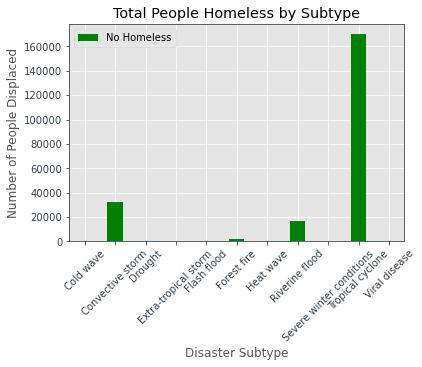

In [52]:
regionalDisGroupbyNoAff.plot.bar(use_index=True, y=["No Homeless"], rot=45, stacked=True, color={"green": "No Homeless"})
plt.title("Total People Homeless by Subtype")
plt.xlabel("Disaster Subtype")
plt.ylabel("Number of People Displaced")

Text(0, 0.5, 'Number of Deaths')

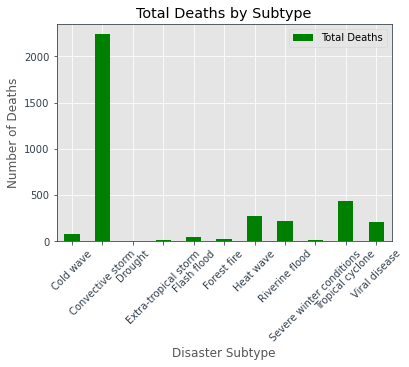

In [53]:
regionalDisGroupbyNoAff.plot.bar(use_index=True, y=["Total Deaths"], rot=45, stacked=True, color={"green": "Total Deaths"})
plt.title("Total Deaths by Subtype")
plt.xlabel("Disaster Subtype")
plt.ylabel("Number of Deaths")

In [92]:
yearly_TotalsRaw = uniqueThirdQuintant.groupby("Year").sum()
desiredColumns = ["Total Deaths", "No Injured", "No Affected", "No Homeless", "Total Affected", "Insured Damages ('000 US$)", "Total Damages ('000 US$)"]
yearly_Totals = yearly_TotalsRaw.loc[:, desiredColumns].reset_index(drop=False)
yearly_Totals

,Year,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$)
0,2000,138.0,146.0,17149.0,3165.0,20460.0,681000.0,2917500.0
1,2001,103.0,18.0,107240.0,70048.0,177306.0,3500000.0,6036000.0
2,2002,405.0,266.0,165102.0,351.0,165719.0,4653500.0,10551000.0
3,2003,146.0,421.0,2545.0,15186.0,18152.0,4972000.0,11884400.0
4,2004,155.0,57.0,43640.0,753.0,44450.0,21250000.0,36160170.0
5,2005,58.0,31.0,300000.0,1410.0,301441.0,11300000.0,16100000.0
6,2006,90.0,268.0,8265.0,0.0,8533.0,4162500.0,3952000.0
7,2007,248.0,349.0,7900.0,768.0,9017.0,3866000.0,5250000.0
8,2008,274.0,518.0,13301000.0,0.0,13301518.0,23775000.0,54502000.0
9,2009,133.0,209.0,8750.0,0.0,8959.0,6165000.0,11306000.0


In [144]:
Test = uniqueThirdQuintant.groupby('Year')['Disaster Subtype'].value_counts()
Test

Year  Disaster Subtype        
2000  Convective storm             5
      Forest fire                  2
      Drought                      1
      Heat wave                    1
      Riverine flood               1
      Tropical cyclone             1
2001  Convective storm             2
      Forest fire                  2
      Heat wave                    1
      Riverine flood               1
      Tropical cyclone             1
2002  Convective storm             6
      Riverine flood               2
      Tropical cyclone             2
      Viral disease                2
      Drought                      1
2003  Convective storm             6
      Riverine flood               1
      Tropical cyclone             1
2004  Convective storm             6
      Tropical cyclone             2
      Riverine flood               1
2005  Convective storm             1
      Forest fire                  1
      Heat wave                    1
      Tropical cyclone             1
2006  C